In [1]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf
import numpy as np 
import matplotlib.pyplot as plt


In [2]:
from google.colab import drive
import h5py

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
raw_health_df = pd.read_csv("/content/drive/MyDrive/health_project/heart_attack_final_table.csv")
raw_health_df.nunique()


id                            5502
ever_overweight                  2
blood_transfusion_yr             4
heart_attack_age                52
fatty_liver                      2
liver_fibrosis                   2
liver_cirrhosis                  2
liver_viral_hepatitis            2
liver_autoimmune_hepatitis       2
other_liver_disease              2
relative_asthma                  2
relative_diabetes                2
relative_heart_attack            2
asthma                           2
heart_failure                    2
chronic_heart_disease            2
angina_pectoris                  2
stroke                           2
thyroid                          2
liver_disease                    2
gallbladder_pr                   2
Total_Cholesterol_mg_dL        249
Frequency_of_Drinking           12
Drinks_per_Day                  16
Work                             2
Recreational                     2
100_Cigarettes                   2
dtype: int64

In [4]:
health_df = raw_health_df[['chronic_heart_disease', 'heart_failure', 'Total_Cholesterol_mg_dL', 'angina_pectoris', 'stroke', 'asthma', 'Frequency_of_Drinking', 'gallbladder_pr', 'Drinks_per_Day', 'thyroid', 'liver_disease']].copy()

health_df.head(2)

,chronic_heart_disease,heart_failure,Total_Cholesterol_mg_dL,angina_pectoris,stroke,asthma,Frequency_of_Drinking,gallbladder_pr,Drinks_per_Day,thyroid,liver_disease
0,0,0,195.0,0,0,0,10.0,0,1.0,0,0
1,0,0,105.0,0,0,0,4.0,0,2.0,0,0


In [9]:
health_df.nunique(axis=0)

chronic_heart_disease        2
heart_failure                2
Total_Cholesterol_mg_dL    249
angina_pectoris              2
stroke                       2
asthma                       2
Frequency_of_Drinking       12
gallbladder_pr               2
Drinks_per_Day              16
thyroid                      2
liver_disease                2
dtype: int64

In [ ]:
#------------------------------------------------------------------------Original--#

In [ ]:
# Run to focus on certain counts 
cholesterol_count = health_df['Total_Cholesterol_mg_dL'].value_counts()
print(cholesterol_count.to_string())

155.0    66
161.0    66
164.0    66
179.0    65
169.0    64
162.0    62
174.0    61
167.0    61
180.0    60
165.0    60
188.0    60
186.0    59
199.0    58
176.0    58
172.0    58
184.0    58
194.0    56
157.0    56
189.0    56
159.0    55
183.0    55
192.0    54
177.0    54
152.0    54
187.0    53
178.0    53
150.0    53
158.0    52
166.0    52
160.0    51
193.0    51
149.0    51
190.0    51
185.0    50
198.0    50
212.0    50
171.0    49
200.0    49
181.0    49
168.0    49
175.0    49
195.0    49
196.0    48
204.0    48
173.0    48
182.0    48
170.0    47
197.0    46
148.0    46
191.0    46
151.0    46
163.0    45
202.0    44
205.0    44
146.0    44
154.0    43
206.0    42
209.0    41
153.0    41
210.0    40
215.0    40
213.0    40
145.0    39
147.0    39
223.0    38
207.0    38
140.0    38
208.0    37
211.0    36
141.0    36
218.0    35
227.0    35
143.0    35
203.0    35
156.0    34
226.0    33
220.0    32
219.0    32
135.0    32
139.0    32
214.0    32
221.0    32
225.0    31
217.

In [ ]:
# Choose a cutoff value and create a list of application types to be replaced
# use the variable name `application_types_to_replace`
cholesterol_types_to_replace = list(cholesterol_count[cholesterol_count < 10].index)

 # Replace in dataframe
for col in cholesterol_types_to_replace:
    health_df['Total_Cholesterol_mg_dL'] = health_df['Total_Cholesterol_mg_dL'].replace(col,"Other")

# # Check to make sure binning was successful
health_df['Total_Cholesterol_mg_dL'].value_counts()

Other    339
161.0     66
155.0     66
164.0     66
179.0     65
        ... 
118.0     11
256.0     11
115.0     11
107.0     10
277.0     10
Name: Total_Cholesterol_mg_dL, Length: 145, dtype: int64

In [ ]:
# Get dummies if not binary 
number_health_df = pd.get_dummies(health_df)

number_health_df.head()

,chronic_heart_disease,heart_failure,angina_pectoris,stroke,asthma,Frequency_of_Drinking,gallbladder_pr,Drinks_per_Day,thyroid,liver_disease,...,Total_Cholesterol_mg_dL_251.0,Total_Cholesterol_mg_dL_252.0,Total_Cholesterol_mg_dL_253.0,Total_Cholesterol_mg_dL_254.0,Total_Cholesterol_mg_dL_255.0,Total_Cholesterol_mg_dL_256.0,Total_Cholesterol_mg_dL_259.0,Total_Cholesterol_mg_dL_261.0,Total_Cholesterol_mg_dL_277.0,Total_Cholesterol_mg_dL_Other
0,0,0,0,0,0,10.0,0,1.0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,4.0,0,2.0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,4.0,0,6.0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,6.0,0,2.0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,9.0,0,1.0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Split our preprocessed data into our features and target arrays
X = number_health_df.drop(["heart_failure"],1).values
y = number_health_df["heart_failure"].values


# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=21)

<ipython-input-25-ddd617380c00>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = number_health_df.drop(["heart_failure"],1).values


In [ ]:
# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [ ]:
# Work with these, see report
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(80, activation="relu", input_dim=154))

# Second hidden layer
nn.add(tf.keras.layers.Dense(30, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 80)                12400     
                                                                 
 dense_1 (Dense)             (None, 30)                2430      
                                                                 
 dense_2 (Dense)             (None, 1)                 31        
                                                                 
Total params: 14,861
Trainable params: 14,861
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Compile the data

nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [ ]:
# Train the model
fit_model = nn.fit(X_train_scaled,y_train,epochs=25)

Epoch 1/25
129/129 [==============================] - 0s 2ms/step - loss: 0.0095 - accuracy: 0.9971
Epoch 2/25
129/129 [==============================] - 0s 2ms/step - loss: 0.0092 - accuracy: 0.9973
Epoch 3/25
129/129 [==============================] - 0s 2ms/step - loss: 0.0090 - accuracy: 0.9973
Epoch 4/25
129/129 [==============================] - 0s 2ms/step - loss: 0.0089 - accuracy: 0.9973
Epoch 5/25
129/129 [==============================] - 0s 2ms/step - loss: 0.0089 - accuracy: 0.9976
Epoch 6/25
129/129 [==============================] - 0s 2ms/step - loss: 0.0090 - accuracy: 0.9976
Epoch 7/25
129/129 [==============================] - 0s 3ms/step - loss: 0.0089 - accuracy: 0.9973
Epoch 8/25
129/129 [==============================] - 0s 2ms/step - loss: 0.0088 - accuracy: 0.9973
Epoch 9/25
129/129 [==============================] - 0s 2ms/step - loss: 0.0086 - accuracy: 0.9976
Epoch 10/25
129/129 [==============================] - 0s 2ms/step - loss: 0.0089 - accuracy: 0.9976

In [ ]:
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

43/43 - 0s - loss: 0.0871 - accuracy: 0.9891 - 357ms/epoch - 8ms/step
Loss: 0.08706340193748474, Accuracy: 0.989098846912384


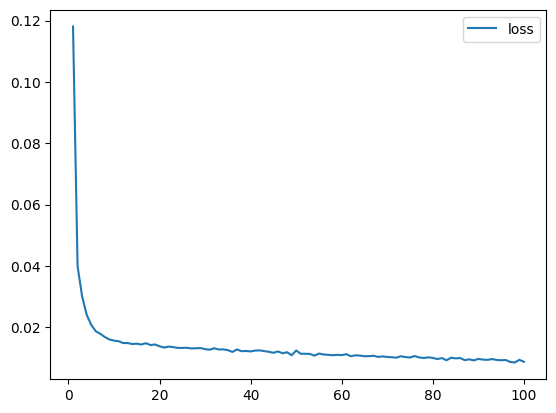

In [ ]:
history_df = pd.DataFrame(fit_model.history)
history_df.index += 1
history_df.plot(y="loss")
plt.show()

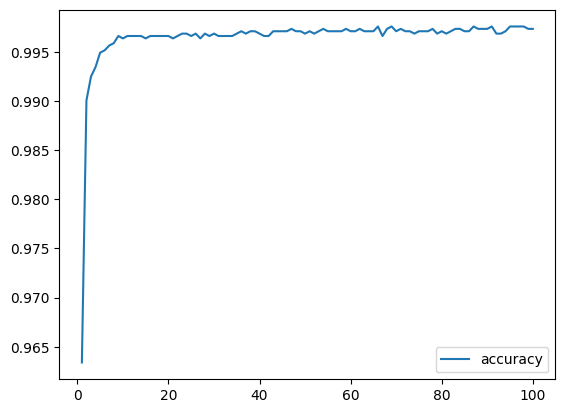

In [ ]:
# Plot the accuracy
history_df.plot(y="accuracy")
plt.show()

In [ ]:
# file_export = "/content/drive2/MyDrive/xyz.h5"
# nn.save(file_export)

In [6]:
#------------------------------------------------------------------------Optimization1--#

In [5]:
# Get dummies
number_health_df = pd.get_dummies(health_df)

# number_health_df.head()
number_health_df

,chronic_heart_disease,heart_failure,Total_Cholesterol_mg_dL,angina_pectoris,stroke,asthma,Frequency_of_Drinking,gallbladder_pr,Drinks_per_Day,thyroid,liver_disease
0,0,0,195.0,0,0,0,10.0,0,1.0,0,0
1,0,0,105.0,0,0,0,4.0,0,2.0,0,0
2,0,0,172.0,0,0,0,4.0,0,6.0,0,0
3,0,0,214.0,0,0,0,6.0,0,2.0,0,0
4,0,0,161.0,0,0,0,9.0,0,1.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
5497,0,0,203.0,0,0,0,3.0,0,1.0,0,0
5498,0,0,200.0,0,0,0,3.0,0,2.0,0,0
5499,0,0,234.0,0,0,0,9.0,0,2.0,0,0
5500,0,0,155.0,0,0,0,5.0,0,5.0,0,0


In [7]:
# Split our preprocessed data into our features and target arrays
X = number_health_df.drop(["heart_failure"],1).values
# X = number_health_df[["thyroid","liver_disease"]].values
y = number_health_df["heart_failure"].values


# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=21)

<ipython-input-7-2f4af94699c0>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = number_health_df.drop(["heart_failure"],1).values


In [39]:
y

array([0, 0, 0, ..., 0, 0, 0])

In [8]:

# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [12]:
# Work with these, see report
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(7, activation="relu", input_dim=10))

# Second hidden layer
nn.add(tf.keras.layers.Dense(14, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 7)                 77        
                                                                 
 dense_4 (Dense)             (None, 14)                112       
                                                                 
 dense_5 (Dense)             (None, 1)                 15        
                                                                 
Total params: 204
Trainable params: 204
Non-trainable params: 0
_________________________________________________________________


In [13]:
# Compile the data

nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [14]:
# Train the model
fit_model = nn.fit(X_train_scaled,y_train,epochs=200)

Epoch 1/200
129/129 [==============================] - 1s 2ms/step - loss: 0.6131 - accuracy: 0.7109
Epoch 2/200
129/129 [==============================] - 0s 2ms/step - loss: 0.2873 - accuracy: 0.9859
Epoch 3/200
129/129 [==============================] - 0s 2ms/step - loss: 0.1300 - accuracy: 0.9889
Epoch 4/200
129/129 [==============================] - 0s 2ms/step - loss: 0.0704 - accuracy: 0.9884
Epoch 5/200
129/129 [==============================] - 0s 2ms/step - loss: 0.0521 - accuracy: 0.9889
Epoch 6/200
129/129 [==============================] - 0s 2ms/step - loss: 0.0448 - accuracy: 0.9889
Epoch 7/200
129/129 [==============================] - 0s 2ms/step - loss: 0.0415 - accuracy: 0.9893
Epoch 8/200
129/129 [==============================] - 0s 2ms/step - loss: 0.0388 - accuracy: 0.9896
Epoch 9/200
129/129 [==============================] - 0s 2ms/step - loss: 0.0376 - accuracy: 0.9889
Epoch 10/200
129/129 [==============================] - 0s 2ms/step - loss: 0.0362 - accura

In [15]:
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

43/43 - 0s - loss: 0.0344 - accuracy: 0.9906 - 225ms/epoch - 5ms/step
Loss: 0.03436454385519028, Accuracy: 0.9905523061752319
